# Usage example: EEG preprocessing multiverse

We first define the forking paths:

In [20]:
from comet.multiverse import Multiverse

forking_paths = {
    "software": ['MNE', 'FieldTrip', 'EEGLab'],
    "resampling": [250, 500, 512],
    "stimulation": ['IAF', '9', '10', '11'],
    "electrode": ['Pz', 'O1', 'O2', 'P3', 'P4'],
}

The template script then adds some signal + noise to a baseline value to create artificial data that systematically variates with some decisions:

In [21]:
def analysis_template():
    import os
    import comet
    import numpy as np

    base_value = 10
    if {{software}} == 'EEGlab':
        base_value += 2
    if {{stimulation}} == 'IAF':
        base_value += 5
    if {{electrode}} == 'Pz':
        base_value += 7
    if {{stimulation}} == 'IAF' and {{electrode}} == 'Pz':
        base_value += 2

    # Generate 50 outcome values (mock differences in alpha power)
    power_diffs = [base_value + np.random.normal(0, 35) for _ in range(50)]

    result = {
        "power_diffs": [round(power_diff, 3) for power_diff in power_diffs],
    }

    comet.data.save_universe_results(result, universe=os.path.abspath(__file__))

We can then create and run the multiverse:

In [22]:
multiverse = Multiverse(name="example_eeg")
multiverse.create(analysis_template, forking_paths)
multiverse.summary();
#multiverse.run(parallel=10)

,Universe,software,resampling,stimulation,electrode
0,Universe_1,MNE,250,IAF,Pz
1,Universe_2,MNE,250,IAF,O1
2,Universe_3,MNE,250,IAF,O2
3,Universe_4,MNE,250,IAF,P3
4,Universe_5,MNE,250,IAF,P4


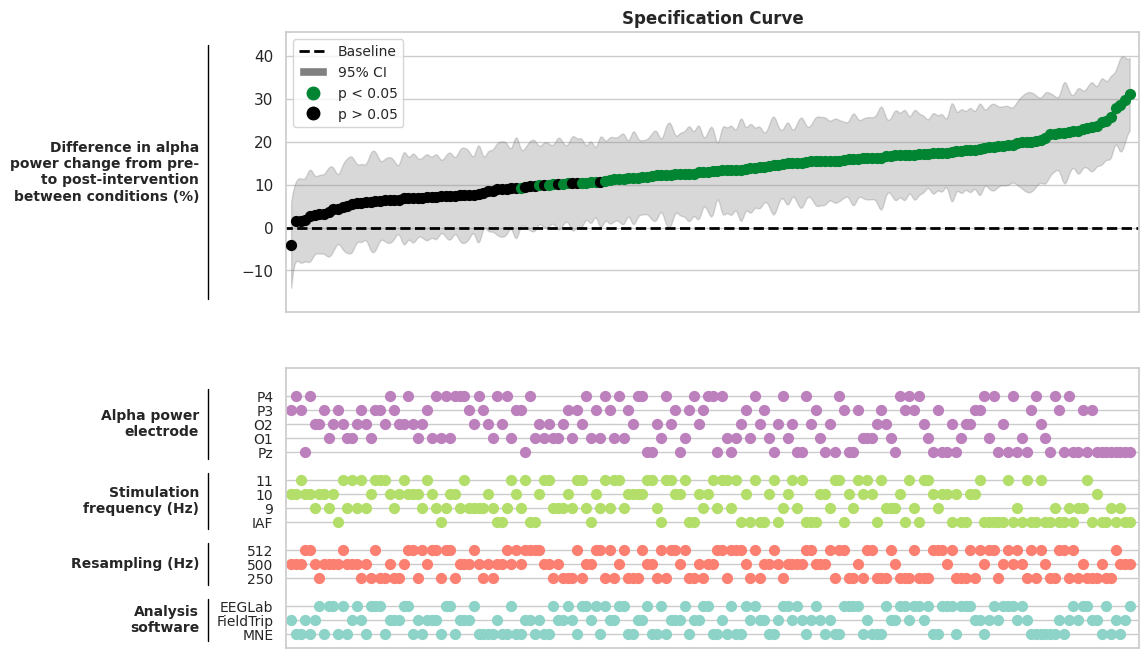

In [23]:
from matplotlib import pyplot as plt

# Custom labels for the specification curve can be provided as a dict
name_map = {
    "power_diffs": "Difference in alpha\npower change from pre-\nto post-intervention\nbetween conditions (%)",
    "software": "Analysis\nsoftware",
    "stimulation": "Stimulation\nfrequency (Hz)",
    "electrode": "Alpha power\nelectrode",
    "resampling": "Resampling (Hz)"
}

multiverse.specification_curve(measure='power_diffs', name_map=name_map, p_value=0.05, ci=95, smooth_ci=True, \
                               cmap="Set3", figsize=(11,8), fontsize=10, height_ratio=[1,1], ftype="pdf");

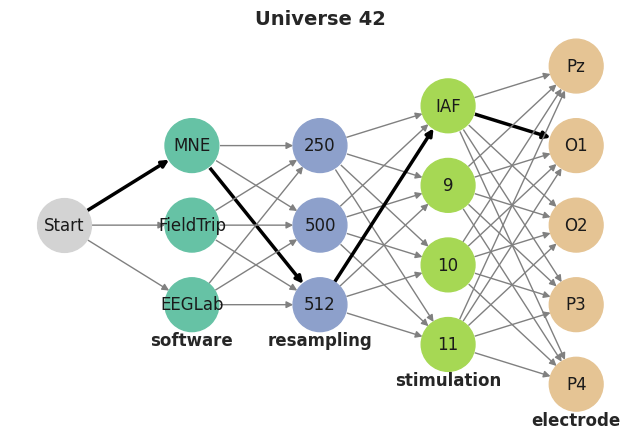

In [25]:
multiverse.visualize(universe=42);